In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import seaborn as sns

In [34]:
saledata = pd.read_csv("Wholesale customers data.csv")
newData = saledata.iloc[:,[4,6]].values

saledata.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [35]:
saledata.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


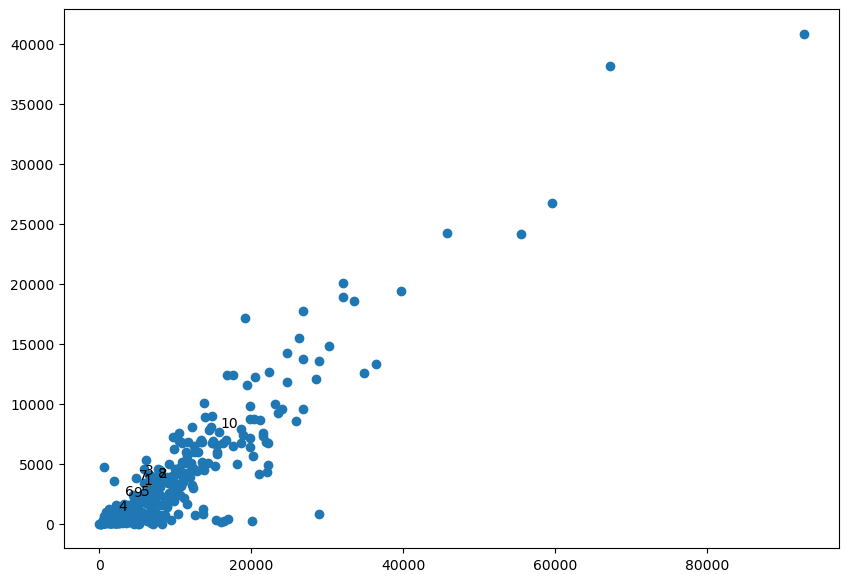

In [36]:
#This shows our two choosen columns, we did it for a better view and for learning. 
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.scatter(newData[:,0],newData[:,1], label='True Position')

for label, x, y in zip(labels, newData[:, 0], newData[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

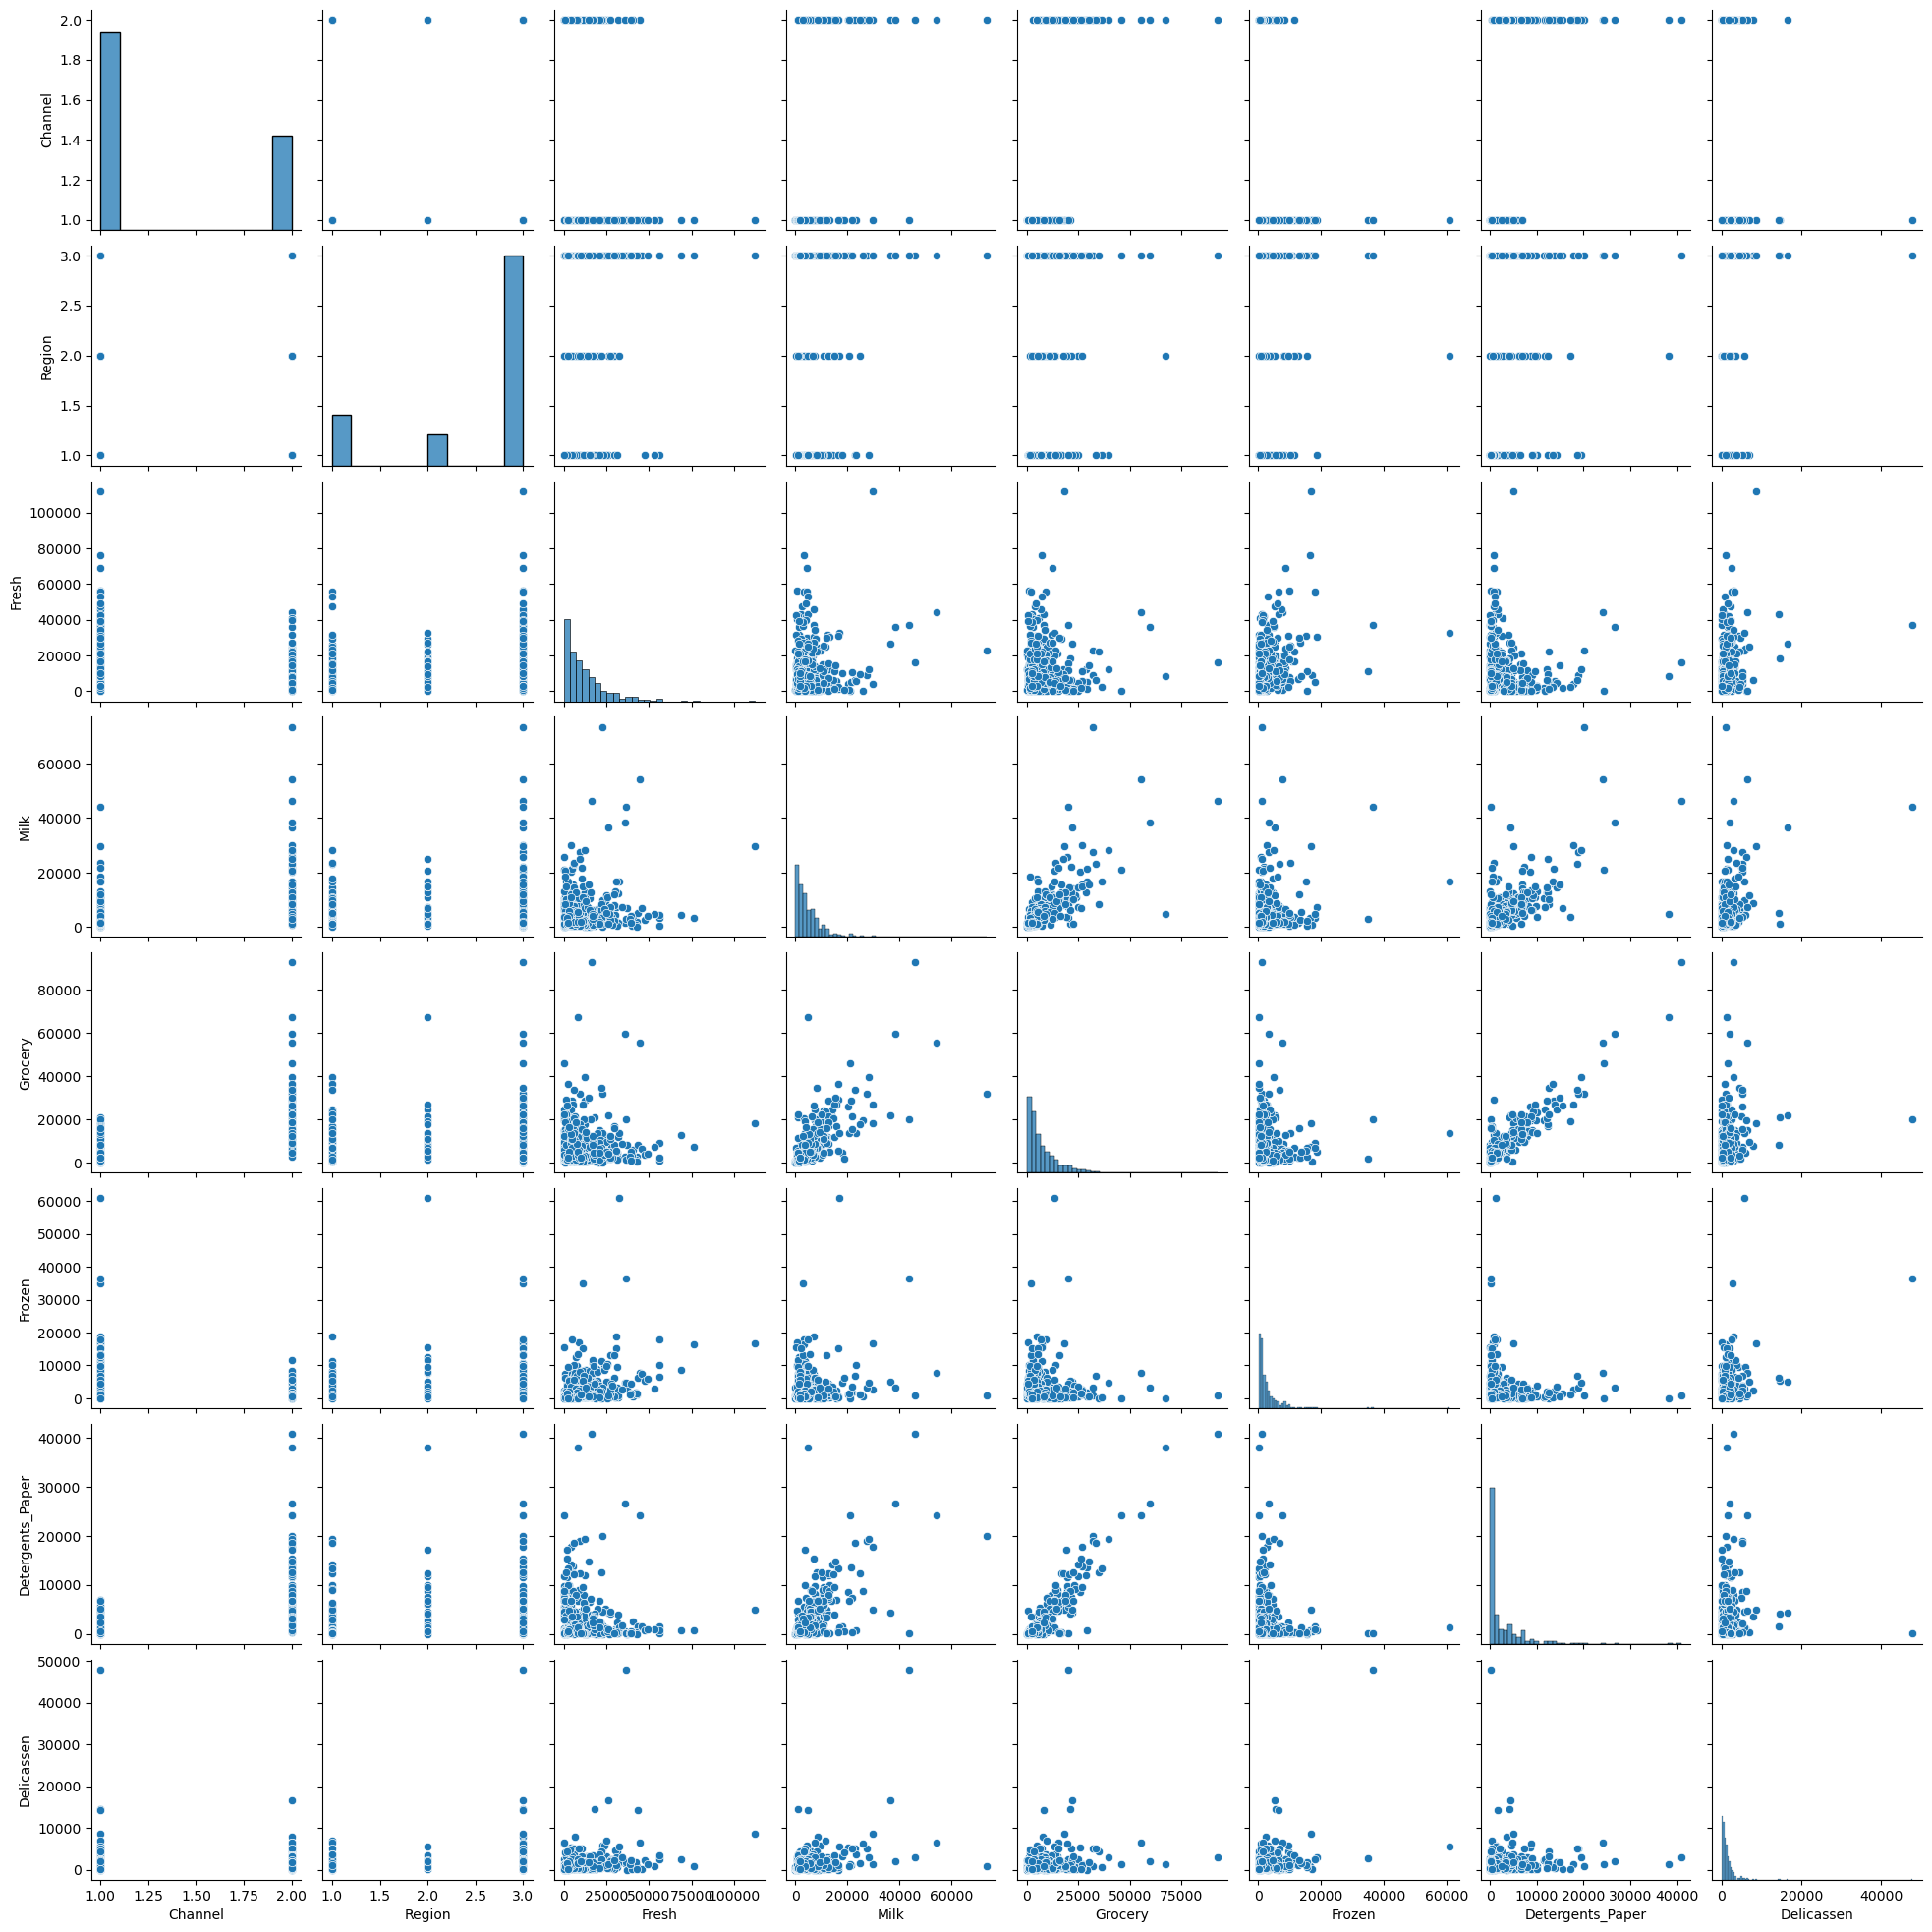

In [5]:
#T2.1
#This exploratory analysis gives us a quick view of all the columns we have. we choose to use Detergents_Paper column and Grocery because we saw that this had a regression line and thats why it was most intressting for us. 
sns.pairplot(data=saledata, vars=['Channel','Region','Fresh', 'Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])
plt.show()

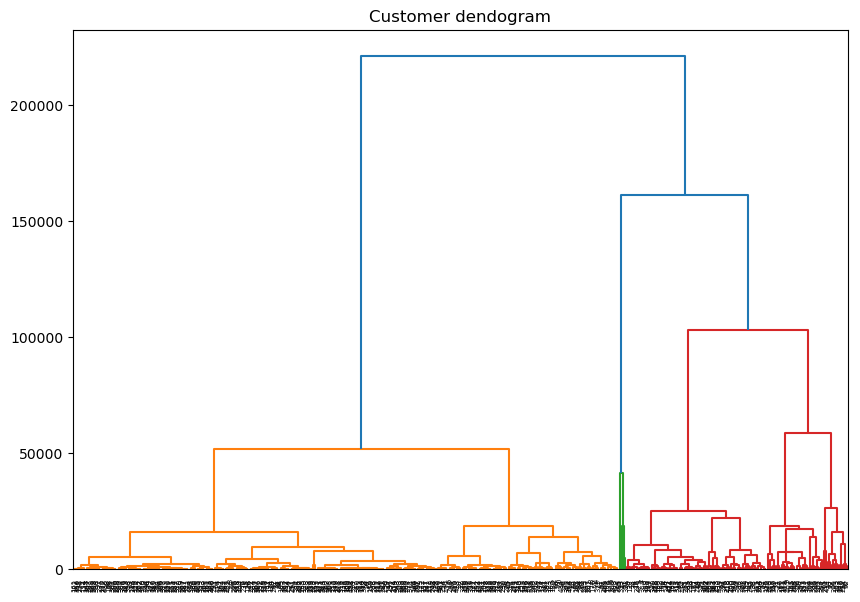

In [11]:
#T2.3 Here we have a dendrogram to identify ideal number of clusters.
plt.figure(figsize=(10,7))
plt.title("Customer dendogram")
dend = shc.dendrogram(shc.linkage(newData, method='ward'))

In [27]:
#T2.4 Here with help of AgglomerativeClustering we tell this alogrithm how many clusters we want plottered. n_clusters= the ammount of clusters.
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(newData)

array([0, 3, 0, 0, 0, 0, 0, 3, 0, 4, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0,
       0, 4, 3, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 4,
       3, 4, 4, 2, 3, 1, 0, 0, 0, 3, 0, 0, 1, 3, 0, 0, 0, 2, 0, 3, 0, 1,
       0, 3, 0, 0, 0, 4, 0, 0, 3, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 4,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 3, 0, 3, 3, 3, 0, 0, 1, 0, 4, 3, 0, 0, 0, 3, 4, 0, 4, 0, 3,
       0, 0, 0, 0, 0, 4, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 4, 0, 0, 0, 3,
       0, 0, 4, 1, 0, 0, 0, 4, 0, 0, 0, 4, 0, 1, 0, 0, 3, 3, 1, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0,

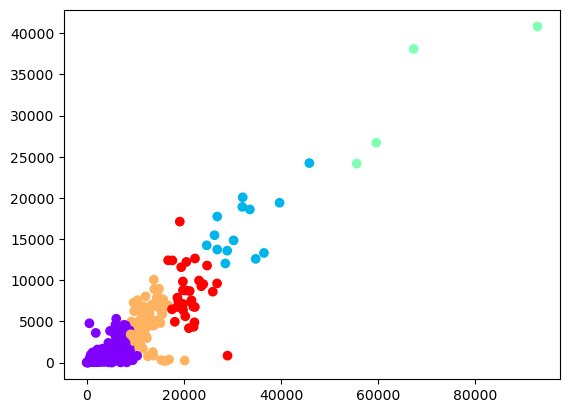

In [28]:
#T2.4 Here we plot out the data on a scatter plot. We can see that if someone spends more on Grocery then they are likley to spend more on Detergents_Paper
plt.scatter(newData[:,0],newData[:,1], c=cluster.labels_, cmap='rainbow')